In [10]:
import cv2
import itertools
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [6]:
mp_face_mesh = mp.solutions.face_mesh

face_mesh_images = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=2,
                                         min_detection_confidence=0.5)

mp_drawing = mp.solutions.drawing_utils

mp_drawing_styles = mp.solutions.drawing_styles

TypeError: 'NoneType' object is not subscriptable

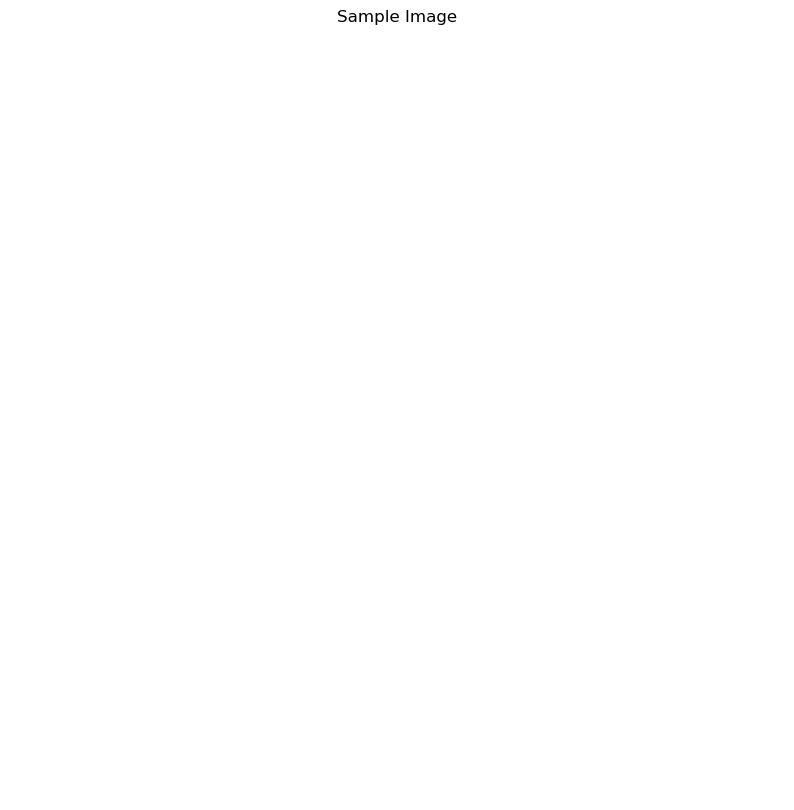

In [7]:
sample_img = cv2.imread('image.png')

plt.figure(figsize = [10, 10])

plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [9]:
face_mesh_results = face_mesh_images.process(sample_img[:,:,::-1])

LEFT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LEFT_EYE)))


RIGHT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_RIGHT_EYE)))

if face_mesh_results.multi_face_landmarks:

    for face_no, face_landmarks in enumerate(face_mesh_results.multi_face_landmarks):

        print(f'FACE NUMBER: {face_no+1}')
        print('-----------------------')

        print(f'LEFT EYE LANDMARKS:n')

        for LEFT_EYE_INDEX in LEFT_EYE_INDEXES[:2]:

            print(face_landmarks.landmark[LEFT_EYE_INDEX])

        print(f'RIGHT EYE LANDMARKS:n')

        for RIGHT_EYE_INDEX in RIGHT_EYE_INDEXES[:2]:

            print(face_landmarks.landmark[RIGHT_EYE_INDEX])

FACE NUMBER: 1
-----------------------
LEFT EYE LANDMARKS:n
x: 0.50781167
y: 0.17196292
z: -0.009777139

x: 0.51582205
y: 0.16978599
z: -0.011620513

RIGHT EYE LANDMARKS:n
x: 0.41616338
y: 0.17315963
z: -0.004553454

x: 0.40655398
y: 0.17653798
z: 0.006722802



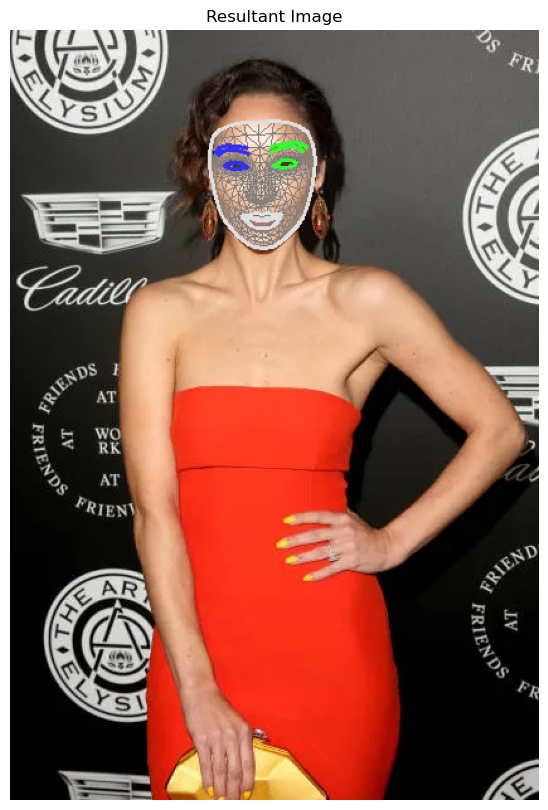

In [10]:
img_copy = sample_img[:,:,::-1].copy()

if face_mesh_results.multi_face_landmarks:

    for face_landmarks in face_mesh_results.multi_face_landmarks:

        mp_drawing.draw_landmarks(image=img_copy, 
                                  landmark_list=face_landmarks,connections=mp_face_mesh.FACEMESH_TESSELATION,
                                  landmark_drawing_spec=None, 
                                  connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())
        
        mp_drawing.draw_landmarks(image=img_copy, landmark_list=face_landmarks,connections=mp_face_mesh.FACEMESH_CONTOURS,
                                  landmark_drawing_spec=None, 
                                  connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())

fig = plt.figure(figsize = [10, 10])
plt.title("Resultant Image");plt.axis('off');plt.imshow(img_copy);plt.show()

### Tiempo real

In [11]:
from modules import keet_database as kdb
import mediapipe as mp
import cv2
import time
# Open the webcam
cap, width, height = kdb.camera_settings(width_cam= 1280, height_cam= 720, camera=1)

cTime, pTime, fps, Ts, time_frames = kdb.frame_settings()

start = time.time()
i = 0
mp_face_mesh = mp.solutions.face_mesh

face_mesh_images = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=2,
                                         min_detection_confidence=0.5)

mp_drawing = mp.solutions.drawing_utils

mp_drawing_styles = mp.solutions.drawing_styles
print('comenzando modelo')
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?")
        break
    # Convert grayscale frame to RGB format
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    face_mesh_results = face_mesh_images.process(rgb_frame)
    
    if face_mesh_results.multi_face_landmarks:
        
        lm = face_mesh_results.multi_face_landmarks
        # Suponiendo que 'lm' es un objeto de tipo NormalizedLandmarkList
        landmarks = lm[0].landmark
        # Extraer las posiciones de los landmarks
        positions_x = np.array([landmark.x for landmark in landmarks])
        positions_y = np.array([landmark.y for landmark in landmarks])
        positions_z = np.array([landmark.z for landmark in landmarks])
        # Dibujar los landmarks en el frame
        mp_drawing.draw_landmarks(frame, lm[0], connections=mp_face_mesh.FACEMESH_TESSELATION,
                                  landmark_drawing_spec=None, 
                                  connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())
        min_x, min_y = np.min(positions_x), np.min(positions_y)
        max_x, max_y = np.max(positions_x), np.max(positions_y)
        # Dibujar un rectángulo alrededor de la cara
        cv2.rectangle(frame, (int(min_x*width), int(min_y*height)), 
                      (int(max_x*width), int(max_y*height)), (255, 0, 0), 2)
    # Detect faces in the frame

    #fps = kdb.calculate_fps()
    # Mostrar FPS en el fotograma
    cTime = time.time()
    fps = 1/(cTime-pTime)
    pTime = cTime 
    Ts = time.time() - time_frames
    time_frames = time.time()
    cv2.putText(frame, f"FPS: {int(fps)}", (20, 50), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 2)
    
    # Mostrar el frame resultante
    cv2.imshow('Face Detection', frame)
    
    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close all windows
cap.release()
cv2.destroyAllWindows()


hola < cv2.VideoCapture 0000021E689183B0>
Resolution: 1280,720
using external camera
comenzando modelo


In [39]:
type(lm[0])

mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList

In [40]:
# Suponiendo que 'lm' es un objeto de tipo NormalizedLandmarkList
landmarks = lm[0].landmark
# Extraer las posiciones de los landmarks
positions_x = np.array([landmark.x for landmark in landmarks])
positions_y = np.array([landmark.y for landmark in landmarks])
positions_z = np.array([landmark.z for landmark in landmarks])

import pandas as pd
df = pd.DataFrame({'cx': positions_x, 'cy': positions_y, 'cz': positions_z})


In [41]:
df

,cx,cy,cz
0,0.681110,0.500068,-0.019741
1,0.689008,0.440937,-0.055726
2,0.683733,0.455150,-0.025093
3,0.679844,0.371505,-0.050602
4,0.690383,0.421621,-0.061413
...,...,...,...
463,0.709815,0.313198,-0.000218
464,0.704468,0.318651,-0.007372
465,0.702496,0.323554,-0.015151
466,0.756936,0.308096,0.013031


In [42]:
positions_x.shape, positions_y.shape, positions_z.shape

((468,), (468,), (468,))